In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv")

In [3]:
df2=df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [8]:
df2


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

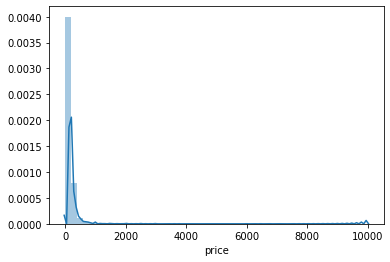

In [19]:
sns.distplot(df2.price)

# Question 2

In [15]:

df2.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
df2["minimum_nights"].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

# Question 3

In [32]:
n=len(df2)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

In [33]:
n_train, n_val,n_test

(29337, 9779, 9779)

In [56]:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [57]:
df_val=df2.iloc[idx[:n_val]]
df_test=df2.iloc[idx[n_val:n_val+n_test]]
df_train=df2.iloc[idx[n_val+n_test:]]

In [58]:
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)

In [59]:
y_train=np.log1p(df_train.price.values)
y_val=np.log1p(df_val.price.values)
y_test=np.log1p(df_test.price.values)

In [60]:
del df_train["price"]
del df_val["price"]
del df_test["price"]

In [118]:
y_train

array([4.07753744, 4.87519732, 5.10594547, ..., 4.87519732, 5.01727984,
       4.79579055])

In [79]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [114]:
def rmse (y,y_pred):
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

In [98]:
def prepare_Xo(df):
    df_num=df
    df_num=df_num.fillna(0)
    Xo=df_num.values
    return Xo

In [70]:
reviews_per_month_mean=df_train["reviews_per_month"].mean()
reviews_per_month_mean

1.378559624736429

In [109]:

def prepare_Xm(df):
    df_num=df
    df_num=df_num.fillna(reviews_per_month_mean)
    Xm=df_num.values
    return Xm

In [120]:
X_train_o=prepare_Xo(df_train)
w0, w=train_linear_regression(X_train_o, y_train)
X_val_o=prepare_Xo(df_val)

y_pred_o=w0+X_val_o.dot(w)
y_pred_o

array([4.76965263, 4.44785531, 4.91187887, ..., 4.1069493 , 4.80929536,
       5.03900532])

In [128]:

X_train_m=prepare_Xm(df_train)
w0, w=train_linear_regression(X_train_m, y_train)
X_val_m=prepare_Xm(df_val)

y_pred_m=w0+X_val_m.dot(w)
rmse_m= rmse(y_val, y_pred_m)



In [129]:
X_train_o=prepare_Xo(df_train)
w0, w=train_linear_regression(X_train_o, y_train)
X_val_o=prepare_Xo(df_val)

y_pred_o=w0+X_val_o.dot(w)
rmse_o= rmse(y_val, y_pred_o)

In [131]:
round (rmse_o, 2), round (rmse_m, 2)

(0.64, 0.64)

ValueError: shapes (29337,) and (1,) not aligned: 29337 (dim 0) != 1 (dim 0)